In [8]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [90]:
def has_pattern(mol, patterns): 
    bools = [mol.HasSubstructMatch(patt) for patt in patterns]
    num_oxy = max([sum([1 for atom in patt.GetAtoms() if atom.GetSymbol() == "O"]) for patt in patterns])
    if True in bools: 
        idx = bools.index(True)
        hit_atoms = [mol.GetAtomWithIdx(i) for i in mol.GetSubstructMatch(patterns[idx])]
        if len([1 for atom in hit_atoms if atom.GetSymbol() != "C"]) <= num_oxy: 
            return True # matches the pattern and has only C and 2 oxygens
    return False

## Find C-linked carboxylic acid groups

In [85]:
patterns = [Chem.MolFromSmarts("[#8]-[#6](=O)"+"~[#6]"*i+"(-[#8])=O") for i in range(3,16)]


True


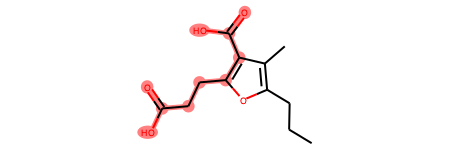

In [91]:
# CMPF (Fig. 7 upper part)
smi = 'CCCC1=C(C)C(C(O)=O)=C(CCC(O)=O)O1'
mol = Chem.MolFromSmiles(smi)
bools = [mol.HasSubstructMatch(patt) for patt in patterns]
if has_pattern(mol, patterns): 
    idx = bools.index(True)
    matches = mol.GetSubstructMatch(patterns[idx])
print(has_pattern(mol, patterns))
mol

True


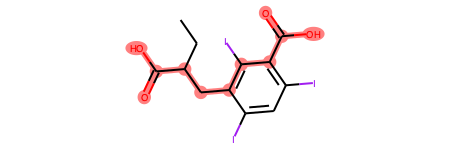

In [93]:
# Iophenoxate (Fig. 7 upper part) but with two COOH groups
smi = 'CCC(CC1=C(I)C(C(O)=O)=C(I)C=C1I)C(O)=O'
mol = Chem.MolFromSmiles(smi)
bools = [mol.HasSubstructMatch(patt) for patt in patterns]
if has_pattern(mol, patterns): 
    idx = bools.index(True)
    matches = mol.GetSubstructMatch(patterns[idx])
print(has_pattern(mol, patterns))
mol